## Question-1

Using the data in `'churn.csv'`:

a- Select the following columns: <br>
        ``['gender','InternetService','Contract','MonthlyCharges','PhoneService','StreamingTV','Churn','Age']``


In [ ]:
import pandas as pd
import numpy as np

file_location = 'churn.csv'
df = pd.read_csv(file_location, delimiter =',')
df = df.loc[:, ['gender', 'InternetService', 'Contract', 'MonthlyCharges', 'PhoneService', 'StreamingTV', 'Churn', 'Age']]
df.head()

,gender,InternetService,Contract,MonthlyCharges,PhoneService,StreamingTV,Churn,Age
0,Female,DSL,Month-to-month,29.85,No,No,No,29
1,Male,DSL,One year,56.95,Yes,No,No,48
2,Male,DSL,Month-to-month,53.85,Yes,No,Yes,64
3,Male,DSL,One year,42.30,No,No,No,24
4,Female,Fiber optic,Month-to-month,70.70,Yes,No,Yes,56


b- Keep only those have phoneService with StreamingTV (be sure to reset the index and remove any additional column). 


In [ ]:
# Your code here
df = df[(df['PhoneService'] == 'Yes') & (df['StreamingTV'] == 'Yes')]
df = df.reset_index(drop=True)
df.head()

,gender,InternetService,Contract,MonthlyCharges,PhoneService,StreamingTV,Churn,Age
0,Female,Fiber optic,Month-to-month,99.65,Yes,Yes,Yes,51
1,Male,Fiber optic,Month-to-month,89.10,Yes,Yes,No,58
2,Female,Fiber optic,Month-to-month,104.80,Yes,Yes,Yes,38
3,Male,Fiber optic,One year,100.35,Yes,Yes,No,27
4,Male,Fiber optic,Month-to-month,103.70,Yes,Yes,Yes,71


## Question-2

a- Find which contract type has the largest number of churn 


In [ ]:
df[['Contract','Churn']].groupby('Contract').count().iloc[0].name

'Month-to-month'

In [ ]:
df['Churn'].replace('No',0, inplace = True)
df['Churn'].replace('Yes',1, inplace = True)
df.groupby(['Contract'])['Churn'].sum()

Contract
Month-to-month    604
One year          112
Two year           34
Name: Churn, dtype: int64

b- What is the average monthly charge of Fiber optic client who pay Month-to-month? is there any difference between males vs females?


In [ ]:
tmp = df[(df['InternetService'] == 'Fiber optic') & (df['Contract'] == 'Month-to-month')]
tmp.mean().iloc[0]

<ipython-input-71-c1b0a2cc13c9>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tmp.mean().iloc[0]


95.5891

In [ ]:
tmp.groupby('gender').mean()['MonthlyCharges']

<ipython-input-72-265675231a24>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp.groupby('gender').mean()['MonthlyCharges']


gender
Female    95.376876
Male      95.795464
Name: MonthlyCharges, dtype: float64

c- Find the number of Female vs male in each contract type

In [ ]:
df.groupby(['Contract','gender']).count()

InternetService  MonthlyCharges  PhoneService  \
Contract       gender                                                  
Month-to-month Female              580             580           580   
               Male                598             598           598   
One year       Female              299             299           299   
               Male                283             283           283   
Two year       Female              336             336           336   
               Male                326             326           326   

                       StreamingTV  Churn  Age  
Contract       gender                           
Month-to-month Female          580    580  580  
               Male            598    598  598  
One year       Female          299    299  299  
               Male            283    283  283  
Two year       Female          336    336  336  
               Male            326    326  326

d- How many Churn males vs females in each contract type? (display results as a table and as a chart)

In [ ]:
df[df['Churn'] == 'Yes'][['Contract','gender','Churn']].groupby(['Contract', 'gender']).count()

Churn
Contract       gender       
Month-to-month Female    300
               Male      304
One year       Female     56
               Male       56
Two year       Female     14
               Male       20

In [ ]:
df_churn = df[df['Churn'] == 'Yes']
table = pd.crosstab(df_churn['Contract'], df_churn['gender'])
print(table)

gender          Female  Male
Contract                    
Month-to-month     300   304
One year            56    56
Two year            14    20


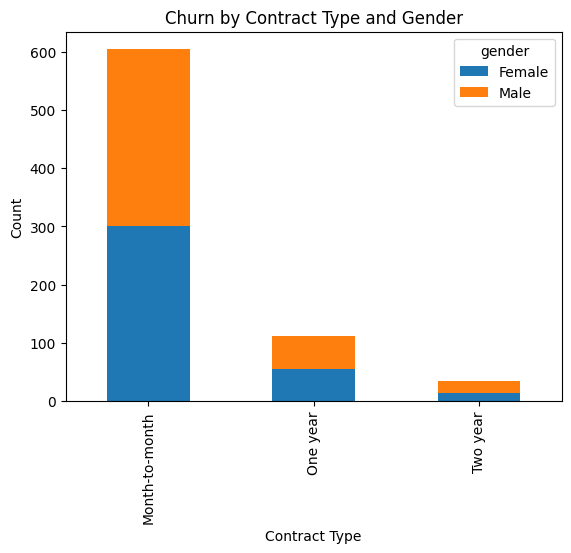

In [ ]:
table.plot(kind='bar', stacked=True)
plt.title('Churn by Contract Type and Gender')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

e- Determine the mean monthly Charges for each contract type<br>
f- Then compare the monthly charges of different contract types visually

In [ ]:
mean_charge = df[['Contract','MonthlyCharges']].groupby('Contract').mean()
mean_charge

,MonthlyCharges
Contract,
Month-to-month,91.380263
One year,93.572938
Two year,95.677190


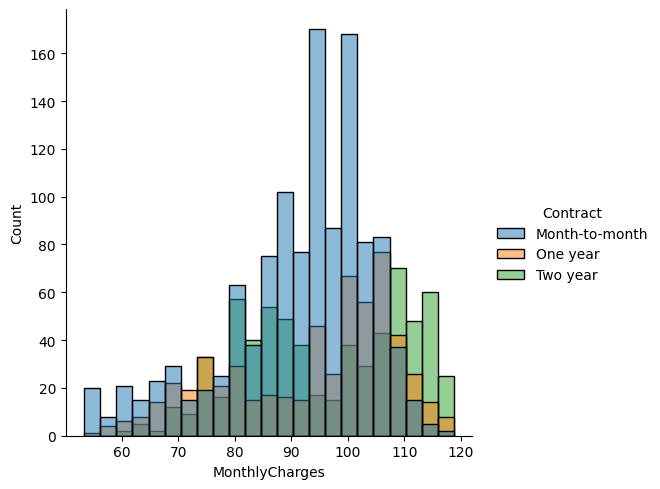

In [ ]:
sns.displot(data=df, x='MonthlyCharges', hue='Contract');

## Question-3

a- Compare the monthly charges of Churn vs non-Churn clients (Visually)<br>
b- Compare the ages of Churn vs non-Churn clients  (Visually)<br>
c- Try to figure out if there is any relation between the monthly charges and age (Visually)<br>

Then explain your findings


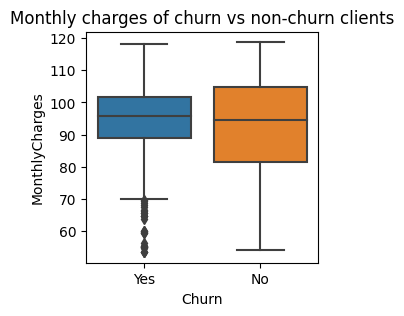

In [ ]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax = ax)

plt.title('Monthly charges of churn vs non-churn clients')
plt.show()

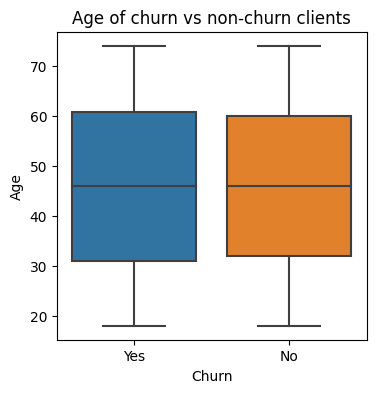

In [ ]:
# Your code here
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='Churn', y='Age', data=df, ax = ax)

plt.title('Age of churn vs non-churn clients')
plt.show()

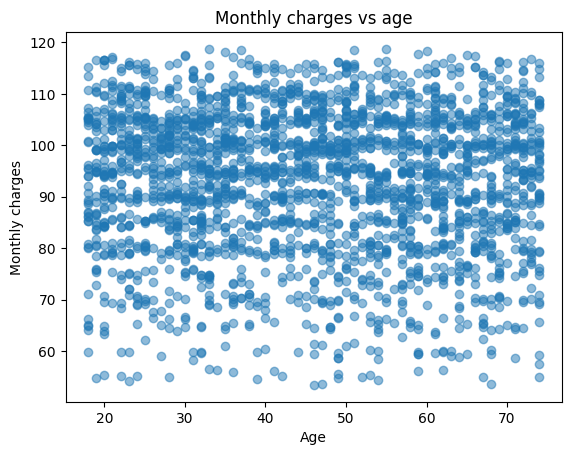

In [ ]:
# Your code here

plt.scatter(df['Age'], df['MonthlyCharges'], alpha=0.5)

plt.title('Monthly charges vs age')
plt.xlabel('Age')
plt.ylabel('Monthly charges')
plt.show()

d- For each Internet Service category determine the mean monthly Charges of Churn vs non-Churn clients.<br>
e- Repeat same step visually (show the histograms of different groups)

In [ ]:
# Your code here
means = df.groupby(['InternetService', 'Churn'])['MonthlyCharges'].mean()
means

InternetService  Churn
DSL              No        77.021264
                 Yes       69.581746
Fiber optic      No       101.495767
                 Yes       96.454294
Name: MonthlyCharges, dtype: float64

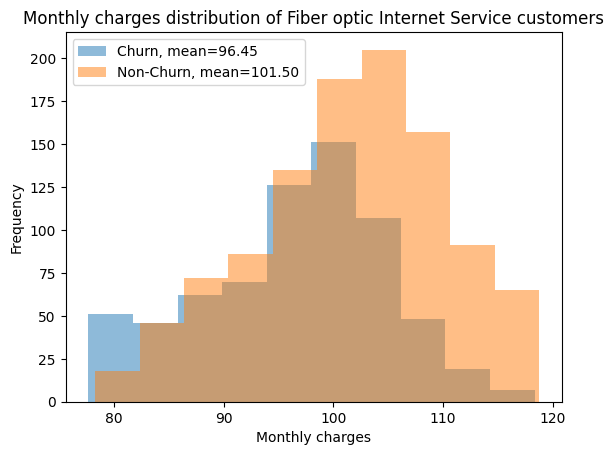

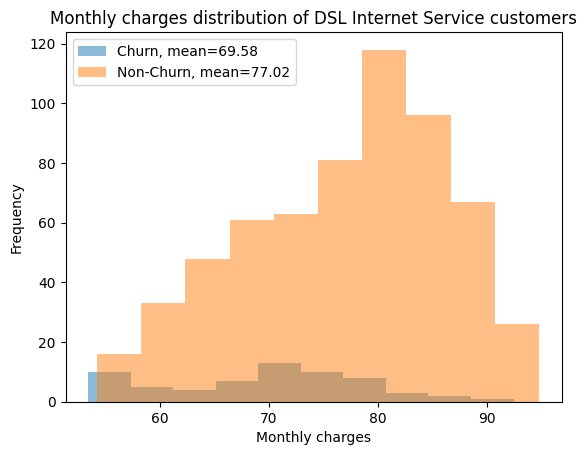

In [ ]:
for internet_service in df['InternetService'].unique():
    churn_means = means[internet_service]['Yes']
    non_churn_means = means[internet_service]['No']
    plt.hist(df[(df['InternetService'] == internet_service) & (df['Churn'] == 'Yes')]['MonthlyCharges'], alpha=0.5, label='Churn, mean={:.2f}'.format(churn_means))
    plt.hist(df[(df['InternetService'] == internet_service) & (df['Churn'] == 'No')]['MonthlyCharges'], alpha=0.5, label='Non-Churn, mean={:.2f}'.format(non_churn_means))

    # Set the title and axis labels of the plot
    plt.title('Monthly charges distribution of {} Internet Service customers'.format(internet_service))
    plt.xlabel('Monthly charges')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

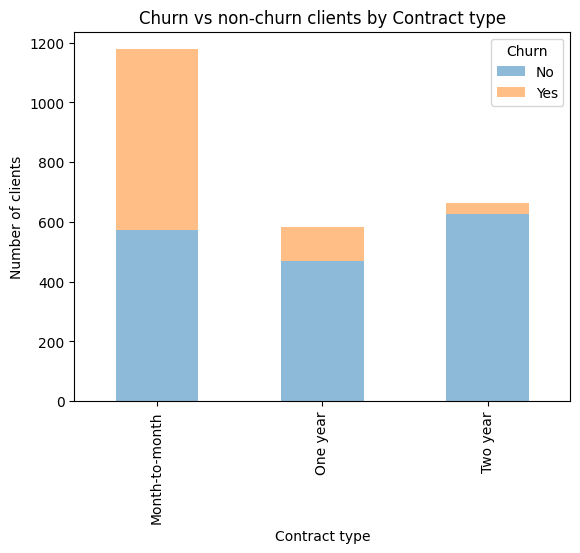

In [ ]:
# Your code here
counts = df.groupby(['Contract', 'Churn']).size().unstack()
ax = counts.plot(kind='bar', stacked=True, alpha=0.5)

ax.set_title('Churn vs non-churn clients by Contract type')
ax.set_xlabel('Contract type')
ax.set_ylabel('Number of clients')
plt.show()